<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/PAMAP2/PAMAP_CBAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
DATA_PATH ='/content/drive/MyDrive/datasets/PAMAP2_integrated_data.csv'

In [3]:
df = pd.read_csv(DATA_PATH, low_memory=False)
print(df.shape)
df.head()

(3850505, 55)


,timestamp,activityID,heart_rate,hand_temp,hand_acc_16g_x,hand_acc_16g_y,hand_acc_16g_z,hand_acc_6g_x,hand_acc_6g_y,hand_acc_6g_z,...,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,subject
0,8.38,0.0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,Protocol_subject101
1,8.39,0.0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,Protocol_subject101
2,8.40,0.0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,Protocol_subject101
3,8.41,0.0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,Protocol_subject101
4,8.42,0.0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,Protocol_subject101


In [4]:
df.columns.tolist()

['timestamp',
 'activityID',
 'heart_rate',
 'hand_temp',
 'hand_acc_16g_x',
 'hand_acc_16g_y',
 'hand_acc_16g_z',
 'hand_acc_6g_x',
 'hand_acc_6g_y',
 'hand_acc_6g_z',
 'hand_gyro_x',
 'hand_gyro_y',
 'hand_gyro_z',
 'hand_mag_x',
 'hand_mag_y',
 'hand_mag_z',
 'hand_orient_1',
 'hand_orient_2',
 'hand_orient_3',
 'hand_orient_4',
 'chest_temp',
 'chest_acc_16g_x',
 'chest_acc_16g_y',
 'chest_acc_16g_z',
 'chest_acc_6g_x',
 'chest_acc_6g_y',
 'chest_acc_6g_z',
 'chest_gyro_x',
 'chest_gyro_y',
 'chest_gyro_z',
 'chest_mag_x',
 'chest_mag_y',
 'chest_mag_z',
 'chest_orient_1',
 'chest_orient_2',
 'chest_orient_3',
 'chest_orient_4',
 'ankle_temp',
 'ankle_acc_16g_x',
 'ankle_acc_16g_y',
 'ankle_acc_16g_z',
 'ankle_acc_6g_x',
 'ankle_acc_6g_y',
 'ankle_acc_6g_z',
 'ankle_gyro_x',
 'ankle_gyro_y',
 'ankle_gyro_z',
 'ankle_mag_x',
 'ankle_mag_y',
 'ankle_mag_z',
 'ankle_orient_1',
 'ankle_orient_2',
 'ankle_orient_3',
 'ankle_orient_4',
 'subject']

In [5]:
columns = [
    "activityID",
    "hand_temp", "hand_acc_6g_x", "hand_acc_6g_y", "hand_acc_6g_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "chest_temp", "chest_acc_6g_x", "chest_acc_6g_y", "chest_acc_6g_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "ankle_temp", "ankle_acc_6g_x", "ankle_acc_6g_y", "ankle_acc_6g_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
]

In [6]:
df = df[columns].copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850505 entries, 0 to 3850504
Data columns (total 31 columns):
 #   Column          Dtype  
---  ------          -----  
 0   activityID      float64
 1   hand_temp       float64
 2   hand_acc_6g_x   float64
 3   hand_acc_6g_y   float64
 4   hand_acc_6g_z   float64
 5   hand_gyro_x     float64
 6   hand_gyro_y     float64
 7   hand_gyro_z     float64
 8   hand_mag_x      float64
 9   hand_mag_y      float64
 10  hand_mag_z      float64
 11  chest_temp      float64
 12  chest_acc_6g_x  float64
 13  chest_acc_6g_y  float64
 14  chest_acc_6g_z  float64
 15  chest_gyro_x    float64
 16  chest_gyro_y    float64
 17  chest_gyro_z    float64
 18  chest_mag_x     float64
 19  chest_mag_y     float64
 20  chest_mag_z     float64
 21  ankle_temp      float64
 22  ankle_acc_6g_x  float64
 23  ankle_acc_6g_y  float64
 24  ankle_acc_6g_z  float64
 25  ankle_gyro_x    float64
 26  ankle_gyro_y    float64
 27  ankle_gyro_z    float64
 28  ankle_mag_x 

In [7]:
feature_cols = [c for c in df.columns if c != "activityID"]

# activityID별로 NaN을 ffill -> bfill
df[feature_cols] = (
    df.groupby("activityID")[feature_cols]
      .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
)

# 아직도 NaN이 남아있으면 그냥 드랍
before_drop = len(df)
df = df.dropna(subset=feature_cols + ["activityID"])
after_drop = len(df)

print("NaN 드랍 전:", before_drop, " / 이후:", after_drop)
df.head()


/tmp/ipython-input-3940382132.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
/tmp/ipython-input-3940382132.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


NaN 드랍 전: 3850505  / 이후: 3850505


,activityID,hand_temp,hand_acc_6g_x,hand_acc_6g_y,hand_acc_6g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,...,ankle_temp,ankle_acc_6g_x,ankle_acc_6g_y,ankle_acc_6g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z
0,0.0,30.0,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,...,30.3125,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438
1,0.0,30.0,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,...,30.3125,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253
2,0.0,30.0,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,...,30.3125,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999
3,0.0,30.0,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,...,30.3125,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956
4,0.0,30.0,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,...,30.3125,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694


In [8]:
#스케일링 (신호 데이터이므로 MinMaxScaler로 스케일링)=>왜???
#신호 데이터는 절대값 차이가 크고, HAR에서는 신호의 절대 크기가 중요하지 않을 때가 많음
#중요한 건 패턴, 변화, 상대적 비율
#따라서 0~1로 정규화하는 게 안정적이다
scaler = MinMaxScaler()

df[feature_cols] = scaler.fit_transform(df[feature_cols].astype(np.float32))

print(df[feature_cols].describe().T.head())


                   count      mean       std  min       25%       50%  \
hand_temp      3850505.0  0.748372  0.176804  0.0  0.647727  0.789773   
hand_acc_6g_x  3850505.0  0.463852  0.049193  0.0  0.426872  0.461320   
hand_acc_6g_y  3850505.0  0.528089  0.047763  0.0  0.508809  0.528417   
hand_acc_6g_z  3850505.0  0.529590  0.032749  0.0  0.510775  0.527469   
hand_gyro_x    3850505.0  0.515706  0.024739  0.0  0.510426  0.515654   

                    75%  max  
hand_temp      0.875000  1.0  
hand_acc_6g_x  0.498460  1.0  
hand_acc_6g_y  0.555163  1.0  
hand_acc_6g_z  0.554037  1.0  
hand_gyro_x    0.520421  1.0  


In [9]:
#윈도우 생성 함수
def create_sliding_windows(features, labels, window_size=200, step_size=100):
    """
    features: (N, num_features)
    labels:   (N,)
    return:   X: (num_seq, window_size, num_features)
              y: (num_seq,)
    """
    X_windows = []
    y_windows = []

    num_samples = len(features)

    for start in range(0, num_samples - window_size + 1, step_size):
        end = start + window_size
        window_x = features[start:end]

        # window 안 label 중 최빈값을 사용
        window_labels = labels[start:end]
        most_common_label = np.bincount(window_labels).argmax()

        X_windows.append(window_x)
        y_windows.append(most_common_label)

    X_windows = np.array(X_windows, dtype=np.float32)
    y_windows = np.array(y_windows, dtype=np.int64)

    return X_windows, y_windows

In [10]:
# numpy로 변환
all_features = df[feature_cols].values.astype(np.float32)
all_labels = df["activityID"].values.astype(int)

print("전체 feature shape:", all_features.shape)  # (N, 33)
print("전체 label shape:", all_labels.shape)

# 윈도우 파라미터
WINDOW_SIZE = 200  # 2초
STEP_SIZE = 100    # 1초 간격

X, y_raw = create_sliding_windows(
    all_features,
    all_labels,
    window_size=WINDOW_SIZE,
    step_size=STEP_SIZE
)

print("윈도우 X shape:", X.shape)
print("윈도우 y_raw shape:", y_raw.shape)


전체 feature shape: (3850505, 30)
전체 label shape: (3850505,)
윈도우 X shape: (38504, 200, 30)
윈도우 y_raw shape: (38504,)


In [11]:
#라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

num_classes = len(label_encoder.classes_)
num_features = X.shape[2]
print("클래스 개수:", num_classes)
print("feature 개수:", num_features)
print("클래스 목록(activityID 원래 값):", label_encoder.classes_)


클래스 개수: 19
feature 개수: 30
클래스 목록(activityID 원래 값): [ 0  1  2  3  4  5  6  7  9 10 11 12 13 16 17 18 19 20 24]


In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.2,            # 20% test
    random_state=RANDOM_SEED,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y_train_val
)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (24642, 200, 30) (24642,)
Val  : (6161, 200, 30) (6161,)
Test : (7701, 200, 30) (7701,)


In [36]:
input_shape = X_train.shape[1:]   # (WINDOW_SIZE, num_features)
print(input_shape)

(200, 30)


모델 정의

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, ReLU, MaxPooling1D,
    GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Multiply,
    Add, Activation, Reshape, Concatenate, Lambda
)

In [38]:
def channel_attention(inputs, reduction_ratio=8):
    """
    CBAM의 Channel Attention 부분.
    - 어떤 채널(feature)이 더 중요한지 학습하게 해줌.
    - GlobalAvg + GlobalMax -> 작은 MLP ->채널별 가중치 생성.
    """
    channel = inputs.shape[-1]  # 마지막 차원이 채널 수

    # Global Average Pooling
    avg_pool = GlobalAveragePooling1D()(inputs)
    avg_pool = Reshape((1, channel))(avg_pool)  # Conv1D와 shape 맞추기 위해 (1, C)로 변환

    # Global Max Pooling
    max_pool = GlobalMaxPooling1D()(inputs)
    max_pool = Reshape((1, channel))(max_pool)

    # 두 Pooling에 동일한 MLP(shared MLP) 적용
    shared_mlp = models.Sequential([
        Dense(channel // reduction_ratio, activation='relu', use_bias=True),
        Dense(channel, activation='relu', use_bias=True)
    ])

    mlp_avg = shared_mlp(avg_pool)
    mlp_max = shared_mlp(max_pool)

    # 두 가지 정보를 더해서 최종 게이트 생성
    cbam_feature = Add()([mlp_avg, mlp_max])
    cbam_feature = Activation('sigmoid')(cbam_feature)  # 0~1 사이의 채널별 중요도

    # 원래 입력에다가 채널별로 곱해주기
    return Multiply()([inputs, cbam_feature])

In [39]:
def spatial_attention(inputs, kernel_size=7):
    """
    '어떤 시간 위치(시퀀스 구간)가 중요한지'에 대한 attention.
    채널 방향으로 평균/최댓값을 구한 뒤,
    Conv1D로 시간 축에 대한 attention map을 만든다.
    """

    avg_pool = Lambda(
        lambda x: tf.reduce_mean(x, axis=-1, keepdims=True)
    )(inputs)  # (B, T, 1)

    max_pool = Lambda(
        lambda x: tf.reduce_max(x, axis=-1, keepdims=True)
    )(inputs)  # (B, T, 1)

    concat = Concatenate(axis=-1)([avg_pool, max_pool])  # (B, T, 2)

    cbam_feature = Conv1D(
        filters=1,
        kernel_size=kernel_size,
        padding='same',
        activation='sigmoid'
    )(concat)  # (B, T, 1)

    return Multiply()([inputs, cbam_feature])

In [40]:
def cbam_block(inputs, reduction_ratio=8, kernel_size=7):
    """
    전체 CBAM 블록.
    - 먼저 Channel Attention -> Spatial Attention 순서로 적용.
    - 마지막에 residual 연결을 더할 수도 있다...
    """
    x = channel_attention(inputs, reduction_ratio=reduction_ratio)
    x = spatial_attention(x, kernel_size=kernel_size)

    #잔차 연결: 너무 과도하게 바뀌지 않게 원래 특징도 같이 유지
    x = Add()([inputs, x])
    return x

In [44]:
inputs = Input(shape=input_shape)

#첫번째 Conv
x = Conv1D(64, kernel_size=5, padding="same")(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

#CBAM
x = cbam_block(x, reduction_ratio=8, kernel_size=7)

#두번째 Conv
x = Conv1D(128, kernel_size=5, padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

#CBAM
x = cbam_block(x, reduction_ratio=8, kernel_size=7)

#세번째 COnv..
x = Conv1D(256, kernel_size=3, padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

x = tf.keras.layers.GlobalAveragePooling1D()(x)

#Dense+드롭아웃으로 비선형 표현 강화
x = Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

cbam_model = models.Model(inputs=inputs, outputs=outputs)

cbam_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 200, 30)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 200, 64)   │      9,664 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 64)   │        256 │ conv1d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 200, 64)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_9     │ (None, 100, 64)   │          0 │ re_lu_9[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ max_pooling1d_9[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ max_pooling1d_9[… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_12          │ (None, 1, 64)     │          0 │ global_average_p… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_13          │ (None, 1, 64)     │          0 │ global_max_pooli… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 1, 64)     │      1,096 │ reshape_12[0][0], │
│ (Sequential)        │                   │            │ reshape_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 1, 64)     │          0 │ sequential_6[0][… │
│                     │                   │            │ sequential_6[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 1, 64)     │          0 │ add_10[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_10         │ (None, 100, 64)   │          0 │ max_pooling1d_9[… │
│ (Multiply)          │                   │            │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_8 (Lambda)   │ (None, 100, 1)    │          0 │ multiply_10[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_9 (Lambda)   │ (None, 100, 1)    │          0 │ multiply_10[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 100, 2)    │          0 │ lambda_8[0][0],   │
│ (Concatenate)       │                   │            │ lambda_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 100, 1)    │         15 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_11         │ (None, 100, 64)   │          0 │ multiply_10[0][0… │
│ (Multiply)          │                   │            │ conv1d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 191,817 (749.29 KB)

 Trainable params: 190,921 (745.79 KB)

 Non-trainable params: 896 (3.50 KB)

In [45]:
cbam_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

In [46]:
history_cbam = cbam_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=callbacks
)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - accuracy: 0.5326 - loss: 1.5722 - val_accuracy: 0.2922 - val_loss: 2.6848 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8339 - loss: 0.5584 - val_accuracy: 0.2104 - val_loss: 3.3224 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8712 - loss: 0.4148 - val_accuracy: 0.2961 - val_loss: 2.9095 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8907 - loss: 0.3438 - val_accuracy: 0.3646 - val_loss: 2.9307 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9007 - loss: 0.3032 - val_accuracy: 0.5497 - val_loss: 1.8309 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9112 - loss: 0.2738 - val_accuracy: 0.5947 - val_loss: 2.0334 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9174 - loss: 0.2492 - val_a

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# ----- 테스트 성능 -----
test_loss, test_acc = cbam_model.evaluate(X_test, y_test, verbose=0)
print(f"[CBAM] Test Loss: {test_loss:.4f}")
print(f"[CBAM] Test Acc : {test_acc:.4f}")

# ----- 예측값 -----
y_pred_prob = cbam_model.predict(X_test, verbose=0)
y_pred = y_pred_prob.argmax(axis=1)


[CBAM] Test Loss: 0.1236
[CBAM] Test Acc : 0.9603


In [48]:
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_.astype(str)
))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2249
           1       0.99      0.98      0.98       386
           2       0.99      0.96      0.97       371
           3       0.98      0.99      0.98       380
           4       0.98      0.96      0.97       477
           5       0.99      0.98      0.99       196
           6       0.99      0.98      0.98       329
           7       0.98      0.97      0.98       376
           9       1.00      1.00      1.00       167
          10       1.00      0.98      0.99       620
          11       0.99      0.97      0.98       109
          12       0.89      0.90      0.90       234
          13       0.92      0.88      0.90       210
          16       0.96      0.94      0.95       351
          17       0.99      0.97      0.98       478
          18       0.95      0.98      0.97       200
          19       0.96      0.99      0.97       375
          20       0.97    

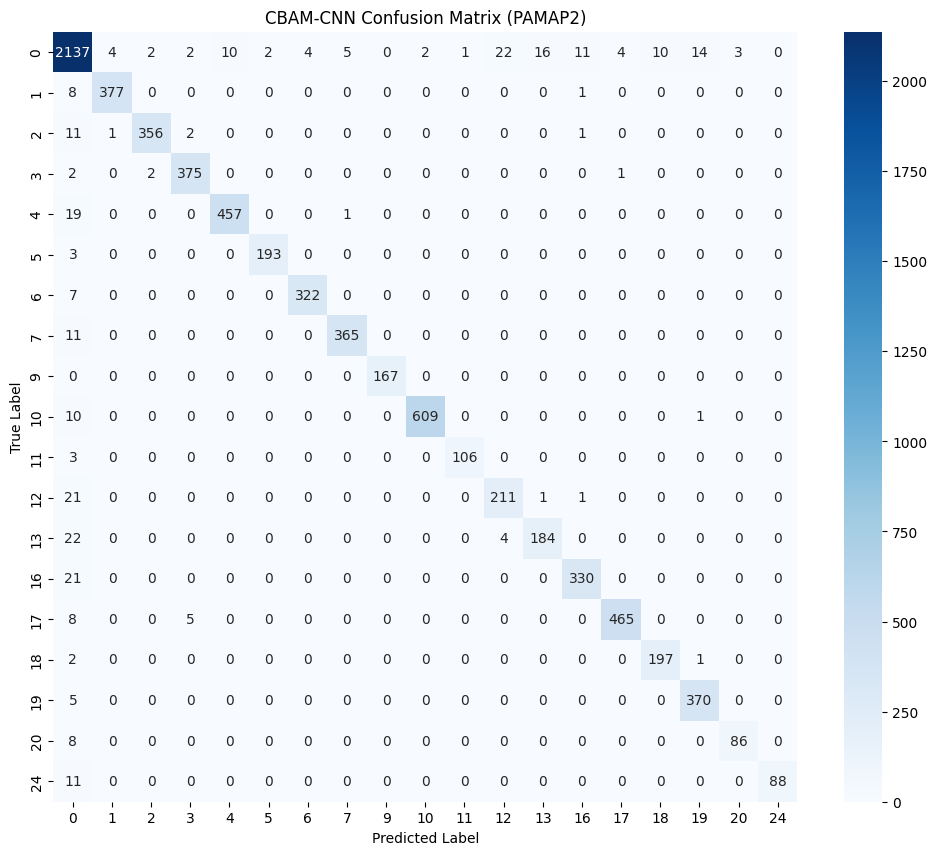

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CBAM-CNN Confusion Matrix (PAMAP2)")
plt.show()